En este documento vamos a realizar un análisis descriptivo de las columnas numéricas y categóricas de nuestros dataframe. 

In [1]:
# Importamos las librerías a utilizar

import pandas as pd # type: ignore
import numpy as np # type: ignore
from src import funciones_soporte as fs
from pandas.api.types import is_datetime64_any_dtype as is_datetime # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
# Indicamos que queremos que nos enseñe por pantalla todas las columnas de los DataFrame que vamos a cargar
pd.set_option('display.max_columns', None)

In [3]:
datos_brasil = pd.read_pickle("datos/datos_brasil.pkl")
print(datos_brasil.shape)
datos_brasil.head(2)

(1026299, 16)


,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,2013-12-31,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0.0,2013-12-31,2013


In [4]:
#datos_brasil.drop(["CÓDIGO ÓRGÃO SUPERIOR", "CÓDIGO ÓRGÃO", "CÓDIGO UNIDADE GESTORA"], axis = 1, inplace = True)

In [5]:
datos_brasil.columns

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECONÔMICA', 'ORIGEM RECEITA', 'ESPÉCIE RECEITA',
       'DETALHAMENTO', 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO',
       'VALOR REALIZADO', 'PERCENTUAL REALIZADO', 'DATA LANÇAMENTO',
       'ANO EXERCÍCIO'],
      dtype='object')

In [6]:
fs.info_df(datos_brasil)

,Tipo_dato,numero_registros,Numero_nulos,%_nulos
CÓDIGO ÓRGÃO SUPERIOR,int64,1026299,0,0.00
NOME ÓRGÃO SUPERIOR,object,1026299,0,0.00
CÓDIGO ÓRGÃO,int64,1026299,0,0.00
NOME ÓRGÃO,object,1026299,0,0.00
CÓDIGO UNIDADE GESTORA,int64,1026299,0,0.00
NOME UNIDADE GESTORA,object,1026299,0,0.00
CATEGORIA ECONÔMICA,object,1026299,0,0.00
ORIGEM RECEITA,object,1026299,0,0.00
ESPÉCIE RECEITA,object,1026299,0,0.00
DETALHAMENTO,object,1026299,0,0.00


In [7]:
datos_brasil.duplicated().sum()

np.int64(0)

 ## Análisis descriptivo

## Análisis variables numéricas

Las columnas del dataframe nos proporcionan información sobre como se estructura la contabilidad, la balanza de pagos de Brasil. Realizaremos un estudio más profundo sobre su estructura contable, y la proveniencia de los ingresos de este país.

In [8]:
# generamos la lista de columnas sobre las cuales queremos calcular los estadísticos
columnas_numericas2 = datos_brasil.select_dtypes(include = [np.number, "datetime"]).columns
columnas_numericas2

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO', 'CÓDIGO UNIDADE GESTORA',
       'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO', 'VALOR REALIZADO',
       'PERCENTUAL REALIZADO', 'DATA LANÇAMENTO', 'ANO EXERCÍCIO'],
      dtype='object')

In [9]:
# Vamos a revisar los estadísticos de las variables numéricas de nuestro dataset.
df_estadisticos = fs.estadisticos_numericas_df(datos_brasil, columnas_numericas2)
df_estadisticos.iloc[3:8,]

,count,mean,min,25%,50%,75%,max,std,Curtosis,Coef_asimetria,Moda
VALOR PREVISTO ATUALIZADO,1026299.0,27611421.049683,-214773743.0,0.0,0.0,0.0,1603521711208.0,3393367175.127452,88556.59,264.11,0.0
VALOR LANÇADO,1026299.0,5242806.106963,-148347267246.910004,0.0,0.0,0.0,357160677863.969971,810883695.355811,80180.68,231.75,0.0
VALOR REALIZADO,1026299.0,24980422.309138,-156285934188.029999,260.905,3022.32,40853.855,771117711060.949951,1406892548.8405,126151.22,290.10,0.0
PERCENTUAL REALIZADO,1026299.0,80.313812,-114552.0,0.0,0.0,0.0,72363772.0,71481.112902,1023400.74,1010.95,0.0
DATA LANÇAMENTO,1025721,2018-09-20 12:23:18.569786368,2013-12-31 00:00:00,2017-03-31 00:00:00,2018-08-27 00:00:00,2020-02-12 00:00:00,2021-12-03 00:00:00,NaN,NaN,NaN,0.0


### *Ingreso previsto actualizado*

El ingreso previsto actualizado medio de Brasil entre 2013 y 2021 se sitúa en los 27.611.421'05 $. La mediana de este valor se sitúa en los 0 dólares. Observamos que la media y la mediana no son valores cercanos, por lo que no vamos a considerar la media como un estadístico representativo de la muestra en este caso. 

La desviación típica se sitúa en un valor de 3.393.367.000 $, lo cual, es una variación considerablemente alta. Nos vamos a encontrar con una alta variabilidad en los ingresos previstos, ya que hay valores menores o iguales a cero y valores rondando el millón. Asimismo debemos tener en cuenta que estamos en la variación de la previsión en un rango de cinco años.

La asimetría presenta un valor de 264,11 y la media es superior a la mediana, por lo que estamos en un caso de asimetría positiva. Esto indica que en la distribución de los datos, nos vamos a encontrar con más valores inferiores. La curtosis tiene un valor de 88.556,59 lo que significa que la distribución de los datos tendrá un apuntamiento elevado. Hay más valores extremos en los datos. Al fin y al cabo, tenemos valores igual a cero, y valores en torno al millón, como hemos comentado anteriormente. 

El rango de ingresos se encuentra entre los -214.773.700 $ y los 1.603.522.000.000 dólares, lo cual es un rango extremadamente alto. Hemos de considerar que estamos ante los ingresos de un país en un rango de 9 años. Por otro lado, será necesario revisar porque tenemos ingresos negativos. La moda se sitúa en los 0 dólares. En cuanto a los cuartiles, nos encontramos que un 75 % de los ingresos se encuentran por debajo de los 0 dólares. 

 

En la tabla a continuación podemos ver los valores que se encuentran en la columna y el número de veces que se repite cada valor.

In [10]:
# Valores de la columna de `Valor previsto atualizado`.

print(f"Los ingresos previstos de brasil entre 2013 y 2021 han sido: {datos_brasil["VALOR PREVISTO ATUALIZADO"].sum().round(2)} \n")
valor_previsto_actualizado = pd.DataFrame(datos_brasil["VALOR PREVISTO ATUALIZADO"].value_counts()).reset_index()
valor_previsto_actualizado

Los ingresos previstos de brasil entre 2013 y 2021 han sido: 28337573811868.72 



,VALOR PREVISTO ATUALIZADO,count
0,0.0,1006459
1,1000000.0,22
2,300000.0,15
3,10000000.0,14
4,100000.0,13
...,...,...
18583,129273010.0,1
18584,82042.0,1
18585,407371.0,1
18586,7416.0,1


In [11]:
previsiones_negativas = valor_previsto_actualizado[valor_previsto_actualizado["VALOR PREVISTO ATUALIZADO"] < 0]
previsiones_positivas = valor_previsto_actualizado[valor_previsto_actualizado["VALOR PREVISTO ATUALIZADO"] > 0]

*Valores negativos*

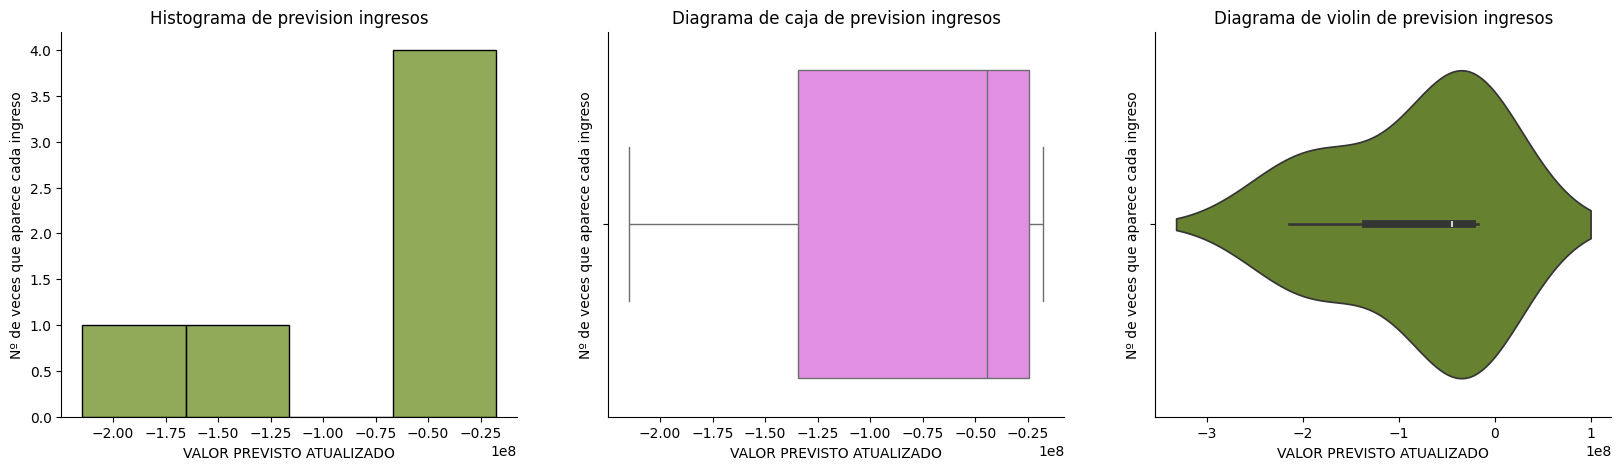

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.histplot(x = "VALOR PREVISTO ATUALIZADO", 
             data = previsiones_negativas, 
             color = "olivedrab",
             ax = axes[0])

axes[0].set_title("Histograma de prevision ingresos")
axes[0].set_ylabel("Nº de veces que aparece cada ingreso")
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False) 

sns.boxplot(x = "VALOR PREVISTO ATUALIZADO", 
            data = previsiones_negativas, 
            color ="violet", 
            ax = axes[1])

axes[1].set_title("Diagrama de caja de prevision ingresos")
axes[1].set_ylabel("Nº de veces que aparece cada ingreso")
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False) 

sns.violinplot(x = "VALOR PREVISTO ATUALIZADO", 
             data = previsiones_negativas, 
             color = "olivedrab",
             ax = axes[2])


axes[2].set_title("Diagrama de violin de prevision ingresos")
axes[2].set_ylabel("Nº de veces que aparece cada ingreso")
axes[2].spines["right"].set_visible(False)
axes[2].spines["top"].set_visible(False) 

*Valores positivos*

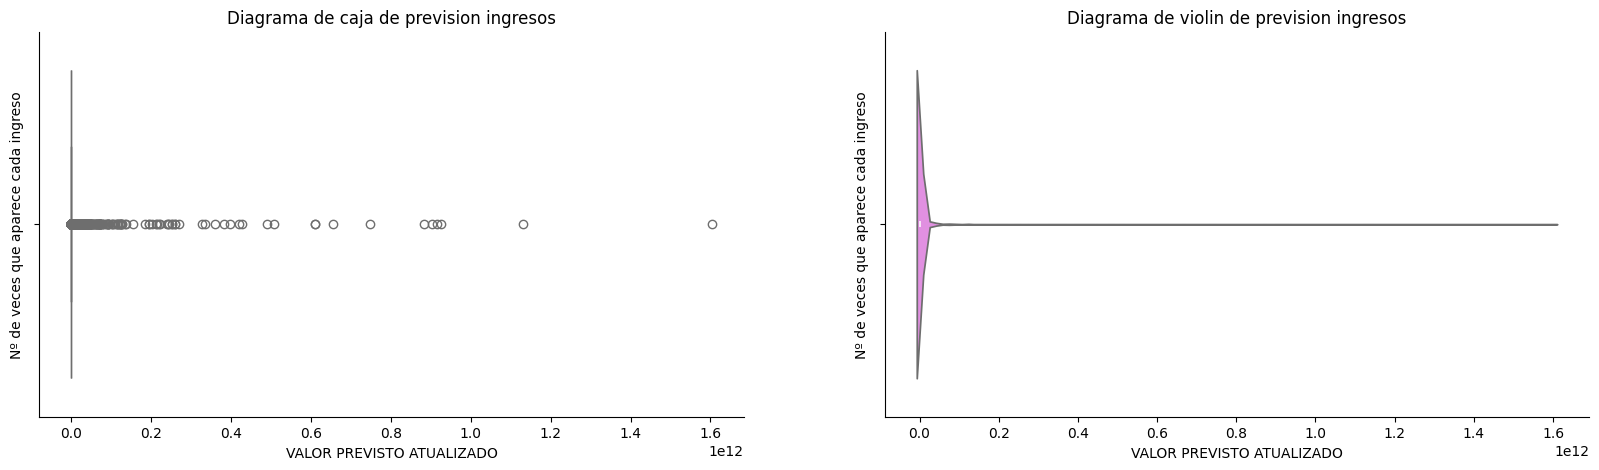

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x = "VALOR PREVISTO ATUALIZADO", 
            data = previsiones_positivas, 
            color ="violet", 
            ax = axes[0])


axes[0].set_title("Diagrama de caja de prevision ingresos")
axes[0].set_ylabel("Nº de veces que aparece cada ingreso")
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False) 

sns.violinplot(x = "VALOR PREVISTO ATUALIZADO", 
            data = previsiones_positivas, 
            color ="violet",
            ax = axes[1])


axes[1].set_title("Diagrama de violin de prevision ingresos")
axes[1].set_ylabel("Nº de veces que aparece cada ingreso")
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False) 

### *Ingresos registrados*

El ingreso registrado medio de Brasil entre 2013 y 2021 se sitúa en los 5.242.806'11 $. La mediana de este valor se sitúa en los 0 dólares. Observamos que la media y la mediana no son valores cercanos, por lo que no vamos a considerar la media como un estadístico representativo de la muestra en este caso. 

La desviación típica se sitúa en un valor de 810.883.700 $, lo cual, es una variación considerablemente alta. Nos vamos a encontrar con una alta variabilidad en los ingresos previstos, ya que hay valores menores e iguales a cero y valores rondando el millón.

La asimetría presenta un valor de 231,75 y la media es superior a la mediana, por lo que estamos en un caso de asimetría positiva. Esto indica que en la distribución de los datos, nos vamos a encontrar con más valores inferiores. La curtosis tiene un valor de 80.180,68 lo que significa que la distribución de los datos tendrá un apuntamiento elevado. Hay más valores extremos en los datos. 

El rango de ingresos se encuentra entre los -148.347.300.000 $ y los 357.160.700.000 dólares, lo cual es un rango extremadamente alto, aunque debemos tener en cuenta que estamos ante los ingresos de un país en un período temporal de 9 años. Por otro lado, será necesario revisar porque tenemos ingresos negativos. La moda se sitúa en los 0 dólares. En cuanto a los cuartiles, nos encontramos que un 75 % de los ingresos se encuentran por debajo de los 0 dólares. 

En la tabla a continuación podemos ver los valores que se encuentran en la columna y el número de veces que se repite cada valor.

In [14]:
# Valores de la columna de `Valor lanzado`.

print(f"Los ingresos recaudados registrados en Brasil entre 2013 y 2021 han sido: {datos_brasil["VALOR LANÇADO"].sum().round(2)} \n")
valor_registrado = pd.DataFrame(datos_brasil["VALOR LANÇADO"].value_counts()).reset_index()
valor_registrado

Los ingresos recaudados registrados en Brasil entre 2013 y 2021 han sido: 5380686664769.53 



,VALOR LANÇADO,count
0,0.000000e+00,1019081
1,-1.000000e-02,32
2,1.000000e-02,25
3,1.100000e-01,10
4,2.000000e-02,9
...,...,...
6784,7.691600e+02,1
6785,-9.852936e+04,1
6786,9.852936e+04,1
6787,-4.151808e+04,1


In [15]:
registros_negativos = valor_registrado[valor_registrado["VALOR LANÇADO"] < 0]
registros_positivos = valor_registrado[valor_registrado["VALOR LANÇADO"] > 0]

*Valores negativos*

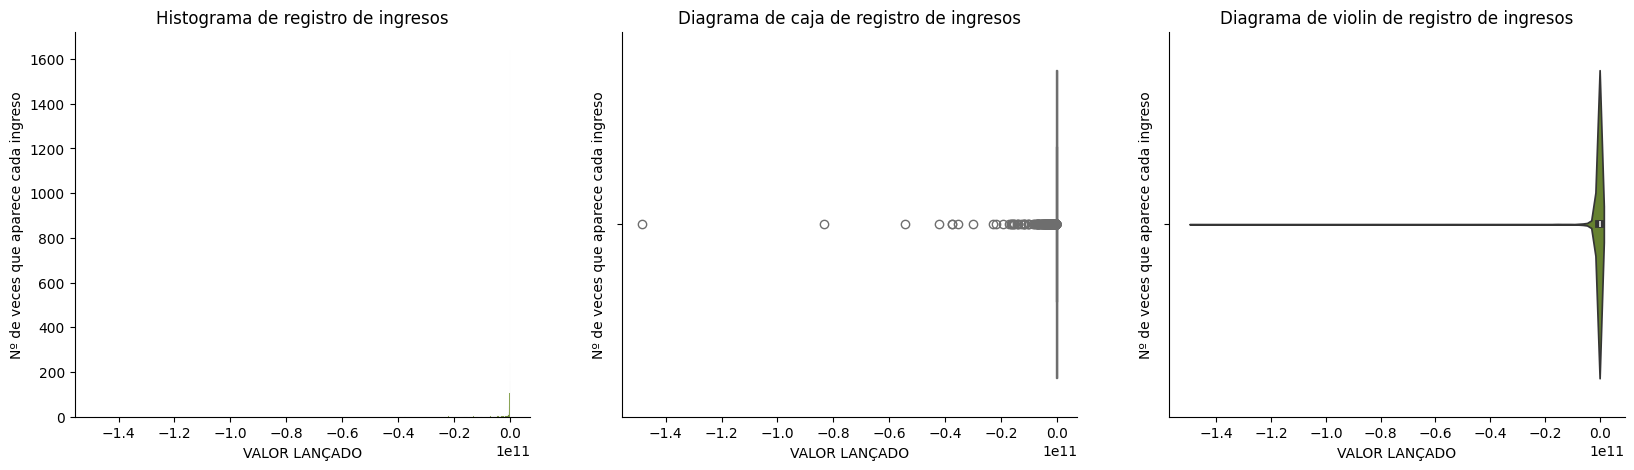

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.histplot(x = "VALOR LANÇADO", 
             data = registros_negativos, 
             color = "olivedrab",
             ax = axes[0])

axes[0].set_title("Histograma de registro de ingresos")
axes[0].set_ylabel("Nº de veces que aparece cada ingreso")
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False) 

sns.boxplot(x = "VALOR LANÇADO", 
            data = registros_negativos, 
            color ="violet", 
            ax = axes[1])

axes[1].set_title("Diagrama de caja de registro de ingresos")
axes[1].set_ylabel("Nº de veces que aparece cada ingreso")
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False) 

sns.violinplot(x = "VALOR LANÇADO", 
             data = registros_negativos, 
             color = "olivedrab",
             ax = axes[2])


axes[2].set_title("Diagrama de violin de registro de ingresos")
axes[2].set_ylabel("Nº de veces que aparece cada ingreso")
axes[2].spines["right"].set_visible(False)
axes[2].spines["top"].set_visible(False) 

*Valores positivos*

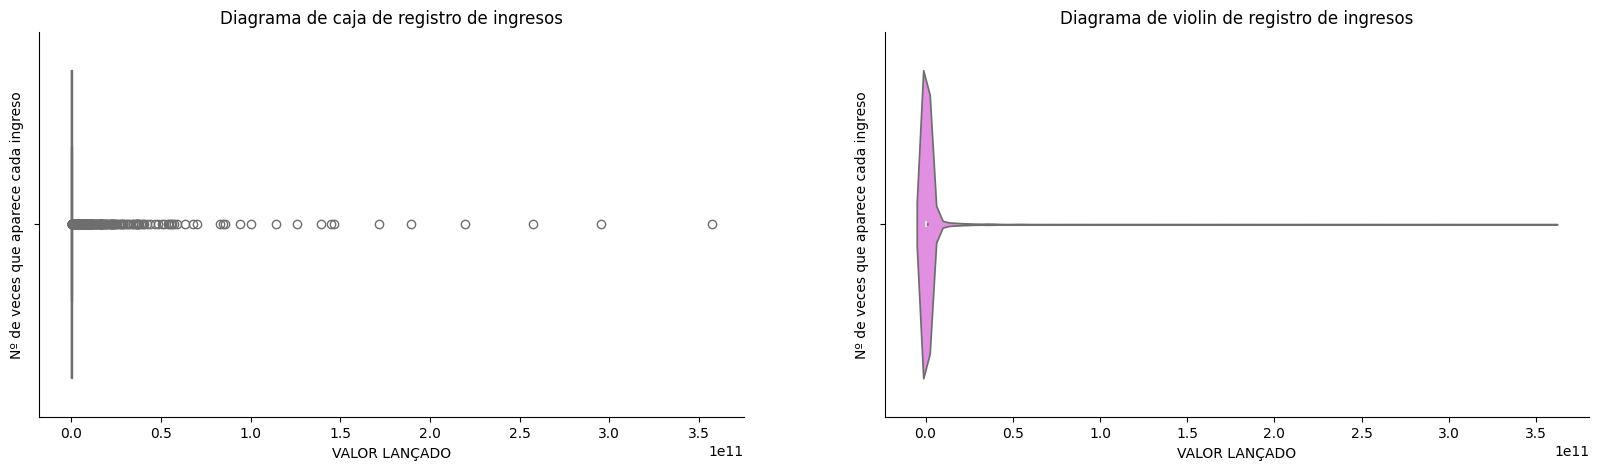

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x = "VALOR LANÇADO", 
            data = registros_positivos, 
            color ="violet", 
            ax = axes[0])


axes[0].set_title("Diagrama de caja de registro de ingresos")
axes[0].set_ylabel("Nº de veces que aparece cada ingreso")
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False) 

sns.violinplot(x = "VALOR LANÇADO", 
            data = registros_positivos, 
            color ="violet",
            ax = axes[1])


axes[1].set_title("Diagrama de violin de registro de ingresos")
axes[1].set_ylabel("Nº de veces que aparece cada ingreso")
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)

### *Ingresos recaudados*

El ingreso previsto actualizado medio de Brasil entre 2013 y 2021 se sitúa en los 24.980.422'31 $. La mediana de este valor se sitúa en los 3.022,32 dólares. Observamos que la media y la mediana no son valores cercanos, por lo que no vamos a considerar la media como un estadístico representativo de la muestra en este caso. 

La desviación típica se sitúa en un valor de 1.406.893.000 $, lo cual, es una variación respecto de la media considerablemente alta. Nos vamos a encontrar con una alta variabilidad en los ingresos previstos, ya que hay valores menores e iguales a cero y valores rondando el millón.

La asimetría presenta un valor de 290,10 y la media es superior a la mediana, por lo que estamos en un caso de asimetría positiva. Esto indica que en la distribución de los datos, nos vamos a encontrar con más valores inferiores. La curtosis tiene un valor de 126.151,22 lo que significa que la distribución de los datos tendrá un apuntamiento elevado. Hay más valores extremos en los datos. 

El rango de ingresos se encuentra entre los -156.285.900.000 $ y los 1.603.522.000.000 dólares, lo cual es un rango extremadamente alto, aunque debemos tener en cuenta que estamos ante los ingresos de un país en un período temporal de 9 años. Por otro lado, será necesario revisar porqué tenemos ingresos negativos. La moda se sitúa en los 0 dólares. En cuanto a los cuartiles, nos encontramos que un 75 % de los ingresos se encuentran por debajo de los 40.853,85 dólares, un valor considerablemente bajo.

En la tabla a continuación podemos ver los valores que se encuentran en la columna y el número de veces que se repite cada valor.

In [18]:
# Valores de la columna de `Valor recaudado`.

print(f"Los ingresos recaudados en Brasil entre 2013 y 2021 han sido: {datos_brasil["VALOR REALIZADO"].sum().round(2)} \n")
valor_recaudado = pd.DataFrame(datos_brasil["VALOR REALIZADO"].value_counts()).reset_index()
valor_recaudado

Los ingresos recaudados en Brasil entre 2013 y 2021 han sido: 25637382435446.0 



,VALOR REALIZADO,count
0,0.00,21007
1,100.00,3515
2,200.00,2878
3,20.00,2858
4,50.00,2701
...,...,...
605778,130276.15,1
605779,324333.68,1
605780,237194.40,1
605781,224389.59,1


In [19]:
recaudaciones_negativas = valor_recaudado[valor_recaudado["VALOR REALIZADO"] < 0]
recaudaciones_positivas = valor_recaudado[valor_recaudado["VALOR REALIZADO"] > 0]

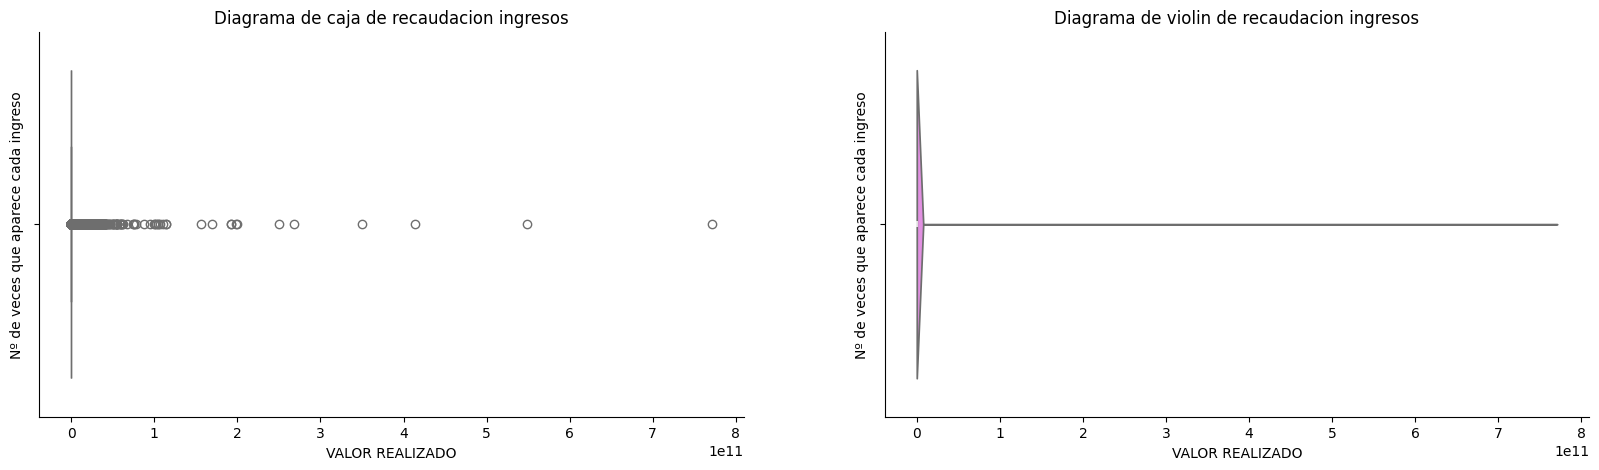

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x = "VALOR REALIZADO", 
            data = recaudaciones_positivas, 
            color ="violet", 
            ax = axes[0])


axes[0].set_title("Diagrama de caja de recaudacion ingresos")
axes[0].set_ylabel("Nº de veces que aparece cada ingreso")
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False) 

sns.violinplot(x = "VALOR REALIZADO", 
            data = recaudaciones_positivas, 
            color ="violet",
            ax = axes[1])


axes[1].set_title("Diagrama de violin de recaudacion ingresos")
axes[1].set_ylabel("Nº de veces que aparece cada ingreso")
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)

 ### *Porcentaje recaudado respecto del previsto*

 El porcentaje de ingresos recaudados respecto de los ingresos previstos medio de Brasil entre 2013 y 2021 se sitúa en los 80,31 %. La mediana de este valor se sitúa en un 0 %. Observamos que la media y la mediana no son valores cercanos, por lo que no vamos a considerar la media como un estadístico representativo de la muestra en este caso. 

La desviación típica se sitúa en un valor de 71.481,11 %, lo cual, es un valor considerablemente alto. 

La asimetría presenta un valor de 1.010,95 y la media es superior a la mediana, por lo que estamos en un caso de asimetría positiva. Esto indica que en la distribución de los datos, nos vamos a encontrar con más valores inferiores. La curtosis tiene un valor de 1.023.400,74 lo que significa que la distribución de los datos tendrá un apuntamiento elevado. Hay más valores extremos en los datos. 

El rango se encuentra entre -114.552,00 % y 72.363.770 %, un rango extremadamente alto. En cuanto a los cuartiles, nos encontramos que un 75 % de los ingresos se encuentran por debajo del 0 %.

En la tabla a continuación podemos ver los valores que se encuentran en la columna y el número de veces que se repite cada valor.

In [20]:
# Valores de la columna de `percentual realizado`.

print(f"Los ingresos recaudados en Brasil entre 2013 y 2021 han sido: {datos_brasil["PERCENTUAL REALIZADO"].sum().round(2)} \n")
valor_previsto_actualizado = pd.DataFrame(datos_brasil["PERCENTUAL REALIZADO"].value_counts())
valor_previsto_actualizado

Los ingresos recaudados en Brasil entre 2013 y 2021 han sido: 82425985.0 



,count
PERCENTUAL REALIZADO,
0.0,1018808
1.0,570
2.0,218
3.0,148
4.0,112
...,...
501.0,1
48270.0,1
444.0,1


### *Fecha de registro de ejecución del ingreso*

In [21]:
datos_brasil["DATA LANÇAMENTO"].describe().reset_index()

,index,DATA LANÇAMENTO
0,count,1025721
1,mean,2018-09-20 12:23:18.569786368
2,min,2013-12-31 00:00:00
3,25%,2017-03-31 00:00:00
4,50%,2018-08-27 00:00:00
5,75%,2020-02-12 00:00:00
6,max,2021-12-03 00:00:00


In [22]:
# Valores de la columna de `Data lancamento `.

print(f"Los ingresos de Brasil han sido registrados en las siguientes fechas: \n \n { datos_brasil["DATA LANÇAMENTO"].unique()}")

Los ingresos de Brasil han sido registrados en las siguientes fechas: 
 
 <DatetimeArray>
['2013-12-31 00:00:00', '2014-12-31 00:00:00', '2015-12-31 00:00:00',
 '2016-04-04 00:00:00', '2016-12-08 00:00:00', '2016-08-22 00:00:00',
 '2016-03-21 00:00:00', '2016-11-04 00:00:00', '2016-04-27 00:00:00',
 '2016-02-11 00:00:00',
 ...
 '2021-02-07 00:00:00', '2021-02-06 00:00:00', '2021-01-16 00:00:00',
 '2021-01-03 00:00:00', '2021-01-17 00:00:00', '2021-10-09 00:00:00',
 '2021-02-14 00:00:00', '2021-01-09 00:00:00', '2021-01-23 00:00:00',
 '2021-01-24 00:00:00']
Length: 2158, dtype: datetime64[ns]


## Análisis variables categóricas

Las columnas con variables categóricas nos proporcionan información sobre la proveniencia de los ingresos de Brasil, así como de la estructura gubernamental del país entre 2013 y 2021. A continuación realizamos un análisis de estas variables de forma detallada. 

In [23]:
# Sacamos los estadísticos de las variables de las columnas categóricas. 
datos_brasil.describe(include = "object").T

,count,unique,top,freq
NOME ÓRGÃO SUPERIOR,1026299,25,Ministério da Educação,361891
NOME ÓRGÃO,1026299,287,Ministério da Economia - Unidades com vínculo ...,119811
NOME UNIDADE GESTORA,1026299,356,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,108481
CATEGORIA ECONÔMICA,1026299,5,Receitas Correntes,979596
ORIGEM RECEITA,1026299,15,Outras Receitas Correntes,322907
ESPÉCIE RECEITA,1026299,63,Serviços Administrativos e Comerciais Gerais,278157
DETALHAMENTO,1026299,1886,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,159039


A continuación revisamos la información columna a columna.

### *Entidad gubernamental superior*

En Brasil, entre 2013 y 2021 nos encontramos con un total de 25 organismos superiores. El organismo que más veces se repite es el Ministerio de Educación, el cual ha ingresado un total de 221.589.353.642,78 $. Este valor se encuentra muy por encima de los ingresos medios. 

In [24]:
ingreso_entidad_superior = datos_brasil[datos_brasil["NOME ÓRGÃO SUPERIOR"] == "Ministério da Educação"]["VALOR REALIZADO"].sum().round(2)
ingreso_entidad_superior

np.float64(221589353642.78)

In [25]:
# Valores de la columna de `Organización superior`

print("Las organizaciones gubernamentales superiores de Brasil entre 2013 y 2021 son: \n ")
detalle_categoría_economica = pd.DataFrame(datos_brasil["NOME ÓRGÃO SUPERIOR"].value_counts())
detalle_categoría_economica["Peso categoría"] = round(((detalle_categoría_economica["count"]/datos_brasil.shape[0])*100), 2)
detalle_categoría_economica


Las organizaciones gubernamentales superiores de Brasil entre 2013 y 2021 son: 
 


,count,Peso categoría
NOME ÓRGÃO SUPERIOR,,
Ministério da Educação,361891,35.26
Ministério da Economia,207574,20.23
Ministério da Defesa,95490,9.30
"Ministério da Agricultura, Pecuária e Abastec",46183,4.50
Ministério da Justiça e Segurança Pública,39980,3.90
Ministério da Infraestrutura,37476,3.65
Ministério da Saúde,33380,3.25
Ministério de Minas e Energia,33014,3.22
"Ministério da Ciência, Tecnologia, Inovações",32846,3.20


### *Entidad gubernamental específica*

En Brasil, entre 2013 y 2021 nos encontramos con un total de 297 organismos específicos. El organismo que más veces se repite es el Ministério da Economia - Unidades com vínculo direto, el cual ha ingresado un total de 208.88.345.811.550,4 $. Este valor se encuentra muy por encima de los ingresos medios. 

In [26]:
ingreso_entidad_específica = datos_brasil[datos_brasil["NOME ÓRGÃO"] == "Ministério da Economia - Unidades com vínculo direto"]["VALOR REALIZADO"].sum().round(2)
ingreso_entidad_específica

np.float64(20888345811550.4)

In [27]:
# Valores de la columna de `Nombre de organización`.

print("Las entidades gubernamentales específicas que nos encontramos en la adminsitración de Brasil son: \n ")
detalle_categoría_economica = pd.DataFrame(datos_brasil["NOME ÓRGÃO"].value_counts())
detalle_categoría_economica["Peso categoría"] = round(((detalle_categoría_economica["count"]/datos_brasil.shape[0])*100), 2)
detalle_categoría_economica

Las entidades gubernamentales específicas que nos encontramos en la adminsitración de Brasil son: 
 


,count,Peso categoría
NOME ÓRGÃO,,
Ministério da Economia - Unidades com vínculo direto,119811,11.67
Fundo do Exército,25559,2.49
Comando da Marinha - Fundo Naval,23734,2.31
Fundo Nacional de Cultura,15955,1.55
Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,13745,1.34
...,...,...
Hospital Cristo Redentor S.A.,2,0.00
Agência de Desenvolvimento da Amazônia,2,0.00
Companhia de Desenvolvimento de Barcarena,1,0.00


### *Entidad gestora*

En Brasil, entre 2013 y 2021 nos encontramos con un total de 356 unidades gestoras. La unidad que más veces se repite es el SETORIAL ORCAMENTARIA E FINANCEIRA / ME	, el cual ha ingresado un total de 20.870.899.752.169,65 $. Este valor se encuentra muy por encima de los ingresos medios. 

In [28]:
ingreso_unidad_gestora = datos_brasil[datos_brasil["NOME UNIDADE GESTORA"] == "SETORIAL ORCAMENTARIA E FINANCEIRA / ME"]["VALOR REALIZADO"].sum().round(2)
ingreso_unidad_gestora

np.float64(20870899752169.65)

In [29]:
# Valores de la columna de `Nombre de organización gestora`.

print("Las organizaciones gestoras que nos encontramos en la adminsitración de Brasil son: \n ")
detalle_org_gestora = pd.DataFrame(datos_brasil["NOME UNIDADE GESTORA"].value_counts())
detalle_org_gestora["Peso categoría"] = round(((detalle_org_gestora["count"]/datos_brasil.shape[0])*100), 2)
detalle_org_gestora

Las organizaciones gestoras que nos encontramos en la adminsitración de Brasil son: 
 


,count,Peso categoría
NOME UNIDADE GESTORA,,
SETORIAL ORCAMENTARIA E FINANCEIRA / ME,108481,10.57
FUNDO DO EXERCITO,25469,2.48
DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM,23532,2.29
IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ,13698,1.33
EMBRAPA-SETORIAL,13641,1.33
...,...,...
IBAMA - SUPERINTENDENCIA DE RORAIMA/RR,2,0.00
COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF,1,0.00
HOSPITAL FEMINA S/A,1,0.00


### *Clasificación económica de los ingresos*

En Brasil, entre 2013 y 2021 los ingresos se han clasificado en un total de 5 categorías económicas generales. La categoría que más ingresos ha recaudado son los ingresos corrientes, con un total de 12.909.343.128.909,44 $. 

In [30]:
ingresos_corrientes_totales = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas Correntes"]["VALOR REALIZADO"].sum().round(2)
ingresos_corrientes_totales

np.float64(12909343128909.44)

In [31]:
# Valores de la columna de `Categoría económica`.

print("Los ingresos de Brasil se clasifican en las siguientes: \n ")
detalle_categoría_economica = pd.DataFrame(datos_brasil["CATEGORIA ECONÔMICA"].value_counts())
detalle_categoría_economica["Peso categoría"] = round(((detalle_categoría_economica["count"]/datos_brasil.shape[0])*100), 2)
detalle_categoría_economica

Los ingresos de Brasil se clasifican en las siguientes: 
 


,count,Peso categoría
CATEGORIA ECONÔMICA,,
Receitas Correntes,979596,95.45
Receitas de Capital,30116,2.93
Receitas Correntes - intra-orçamentárias,16235,1.58
Sem informação,257,0.03
Receitas de Capital - intra-orçamentárias,95,0.01


### *Origen de los ingresos*

En Brasil, entre 2013 y 2021 los ingresos han provenido de un total de 15 categorías diferentes. La categoría que más ingresos ha recaudado es la de Otros ingresos corrientes, con un total de 495.575.920.557,84 $. 

In [32]:
otros_ingresos_corrientes_totales = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Outras Receitas Correntes"]["VALOR REALIZADO"].sum().round(2)
otros_ingresos_corrientes_totales

np.float64(495575920557.84)

In [33]:
# Valores de la columna de `Origen de ingresos`.

print("Los ingresos de Brasil provienen de las siguientes categorías: \n ")
detalle_origen_ingreso = pd.DataFrame(datos_brasil["ORIGEM RECEITA"].value_counts())
detalle_origen_ingreso["Peso categoría"] = round(((detalle_origen_ingreso["count"]/datos_brasil.shape[0])*100), 2)
detalle_origen_ingreso


Los ingresos de Brasil provienen de las siguientes categorías: 
 


,count,Peso categoría
ORIGEM RECEITA,,
Outras Receitas Correntes,322907,31.46
Receita de Serviços,322319,31.41
Receita Patrimonial,163171,15.90
"Impostos, Taxas e Contribuições de Melhoria",78340,7.63
Contribuições,66781,6.51
Receita Industrial,18857,1.84
Receita Agropecuária,13642,1.33
Alienação de Bens,12418,1.21
Amortizações de Empréstimos,11318,1.10


### *Tipo de ingreso*

En Brasil, entre 2013 y 2021 los ingresos han sido de un total de 63 tipos diferentes. La categoría que más ingresos ha recaudado es la de Otros ingresos corrientes, con un total de 32.059.641.128,12 $.

In [34]:
tipo_ingresos = datos_brasil[datos_brasil["ESPÉCIE RECEITA"] == "Serviços Administrativos e Comerciais Gerais"]["VALOR REALIZADO"].sum().round(2)
tipo_ingresos

np.float64(32059641128.12)

In [35]:
# Valores de la columna de `Especie de ingreso`.

print("Los ingresos de Brasil provienen de las siguientes categorías: \n ")
detalle_especie_ingreso = pd.DataFrame(datos_brasil["ESPÉCIE RECEITA"].value_counts())
detalle_especie_ingreso["Peso categoría"] = round(((detalle_especie_ingreso["count"]/datos_brasil.shape[0])*100), 2)
detalle_especie_ingreso

Los ingresos de Brasil provienen de las siguientes categorías: 
 


,count,Peso categoría
ESPÉCIE RECEITA,,
Serviços Administrativos e Comerciais Gerais,278157,27.10
"Indenizações, restituições e ressarcimentos",143577,13.99
"Multas administrativas, contratuais e judicia",115276,11.23
Exploração do patrimônio imobiliário do Estad,88862,8.66
Taxas,62336,6.07
...,...,...
Remuneração das Disponibilidades do Tesouro N,3,0.00
Receitas decorrentes de compensações ao Regim,2,0.00
Demais receitas de capital,2,0.00


### *Detalle de tipo de ingreso*

En Brasil, entre 2013 y 2021 los ingresos han sido de un total de 18.886 tipos detallados diferentes. La categoría que más ingresos ha recaudado es la de SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC., con un total de 11.191.514.628,86 $.


In [36]:
tipo_ingresos_detallado = datos_brasil[datos_brasil["DETALHAMENTO"] == "SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC."]["VALOR REALIZADO"].sum().round(2)
tipo_ingresos_detallado

np.float64(11191514628.86)

In [37]:
# Valores de la columna de `Detalle adicional del tipo de ingreso`.
print("Los ingresos de Brasil provienen de las siguientes categorías en 2013: \n")
detalle_adicional_ingreso = pd.DataFrame(datos_brasil["DETALHAMENTO"].value_counts())
detalle_adicional_ingreso["Peso categoría"] = round(((detalle_adicional_ingreso["count"]/datos_brasil.shape[0])*100), 2)
detalle_adicional_ingreso

Los ingresos de Brasil provienen de las siguientes categorías en 2013: 



,count,Peso categoría
DETALHAMENTO,,
SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,159039,15.50
INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL,74638,7.27
ALUGUEIS E ARRENDAMENTOS-PRINCIPAL,71040,6.92
MULTAS PREVISTAS EM LEGISL.ESPECIFICA-PRINC.,44580,4.34
RESTIT.DE DESPESAS DE EXERC.ANTERIORES-PRINC.,31513,3.07
...,...,...
SERV.REG.AN.CONTR.PROD.SUJ.A NORM.VIGIL.SANIT,1,0.00
Valores Mobiliários,1,0.00
ITR-MUNICIPIOS CONVENIADOS-DIVIDA ATIVA,1,0.00


### *Ejercicios analizados*

In [38]:
# Valores de la columna de `Año ejercicio`.

print(f"Los ingresos de Brasil han sido registrados en las siguientes fechas: \n \n { datos_brasil["ANO EXERCÍCIO"].unique()}")

Los ingresos de Brasil han sido registrados en las siguientes fechas: 
 
 [2013 2014 2015 2016 2017 2018 2019 2020 2021]
